In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [211]:
df = pd.read_csv('../Data/ConversionRate/conversion_data.csv')

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [213]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [214]:
for c in list(df.columns):
    n = df[c].unique()
    if len(n) < 130:
        print('columns:', c)
        print('category:', n)
        print(' ')
    else:
        print(' ')
        print(c + ':' + str(len(n)) + ' unique values')
        print(' ')

columns: country
category: ['UK' 'US' 'China' 'Germany']
 
columns: age
category: [ 25  23  28  39  30  31  27  29  38  43  24  36  37  33  20  35  17  50
  22  18  34  19  42  32  21  48  40  41  26  45  44  49  46  56  52  54
  51  47  53  60  57  55  59  61  58  62  65  63  66  67  64  68  69 123
  70  73  77  72  79 111]
 
columns: new_user
category: [1 0]
 
columns: source
category: ['Ads' 'Seo' 'Direct']
 
columns: total_pages_visited
category: [ 1  5  4  6  2  8  7  3  9 14 10 11 18 15 19 12 13 21 17 23 16 25 26 20
 22 24 27 28 29]
 
columns: converted
category: [0 1]
 


### A quick observation shows spurious ages. Let's take a look and remove them if possible

In [215]:
print(df.loc[df.age==111])
print(df.loc[df.age==123])

       country  age  new_user source  total_pages_visited  converted
295581      UK  111         0    Ads                   10          1
       country  age  new_user source  total_pages_visited  converted
90928  Germany  123         0    Seo                   15          1


In [216]:
df.drop([295581,90928], inplace=True)

In [217]:
print(df.isnull().sum())
print('\n',"Size of df:"+ str(len(df)))

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

 Size of df:316198


### Exploratory Data Analysis

In [218]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [219]:
numerical_list = ['age', 'total_pages_visited']
categorical_list = ['country', 'source']

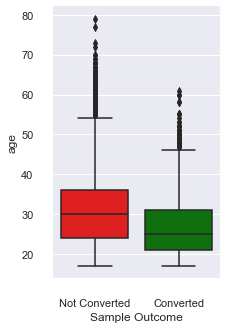

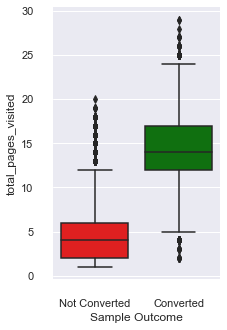

In [220]:
for i in range(0, len(numerical_list)):
    plt.figure(figsize=(3,5))
    pal = {0: "red",  1: "green"}
    fig = sns.boxplot(x='converted', 
                      y=numerical_list[i],
                      palette=pal,
                     data = df, 
                     showfliers = True)
    plt.xlabel('Sample Outcome')
    plt.ylabel(numerical_list[i])
    fig.set_xticklabels(['Not Converted', 'Converted'], rotation = 90)
    sns.despine(offset=10, trim=True)
    plt.show
                      

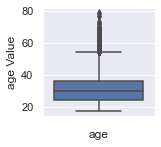

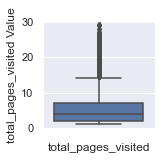

In [221]:
for i in range(0, len(numerical_list)):
    plt.figure(figsize=(2,2))
    sns.boxplot(y=numerical_list[i],
               data = df,
               showfliers=True)
    plt.xlabel(numerical_list[i])
    plt.ylabel(str(numerical_list[i] + ' Value'))
    plt.show()

#### The boxplots seem to indicate that:
#### 1. the non-conversion rate is more prominent for older people than younger.
#### 2. The conversion rate increases with more pages visited
#### 3. Overall the data contains outliers that we will address later on 

### The Plots below support the observations from the boxplots

In [222]:
df_ages = df.groupby('age')[['converted']].mean()

### The conversion rate decreases with age 

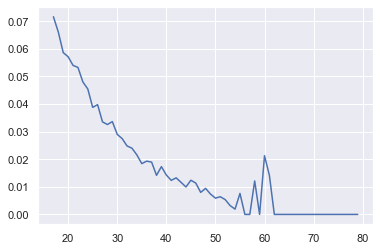

In [223]:
plt.plot(df_ages.index,df_ages['converted'])

In [224]:
df_tot_pages = df.groupby('total_pages_visited')[['converted']].mean()

### High total Pages visited is a strong indicator for high conversion rate

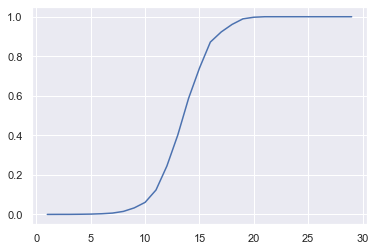

In [225]:
plt.plot(df_tot_pages.index,df_tot_pages['converted'])

### A closer Look on Categorical Features

In [226]:
df[categorical_list] = df[categorical_list].astype('str')

In [227]:
df

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


In [228]:
df_cat = pd.get_dummies(df[categorical_list])

In [229]:
df_cat         

,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,0,0,1,0,1,0,0
1,0,0,0,1,0,0,1
2,0,0,0,1,0,0,1
3,1,0,0,0,0,0,1
4,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...
316195,0,0,0,1,1,0,0
316196,0,0,0,1,0,1,0
316197,1,0,0,0,1,0,0
316198,0,0,0,1,0,0,1


In [245]:
#df = pd.concat([df, df_cat], axis=1)
df_data = pd.concat([df[['age', 'new_user', 'total_pages_visited', 'converted']], df_cat], axis=1)

In [246]:
df_data

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
316195,26,1,9,0,0,0,0,1,1,0,0
316196,27,1,6,0,0,0,0,1,0,1,0
316197,25,0,4,0,1,0,0,0,1,0,0
316198,22,0,4,0,0,0,0,1,0,0,1


/opt/anaconda2/envs/HSD/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda2/envs/HSD/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda2/envs/HSD/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda2/envs/HSD/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda2/envs/HSD/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda2/envs/HSD/lib/python3.6/site-pa

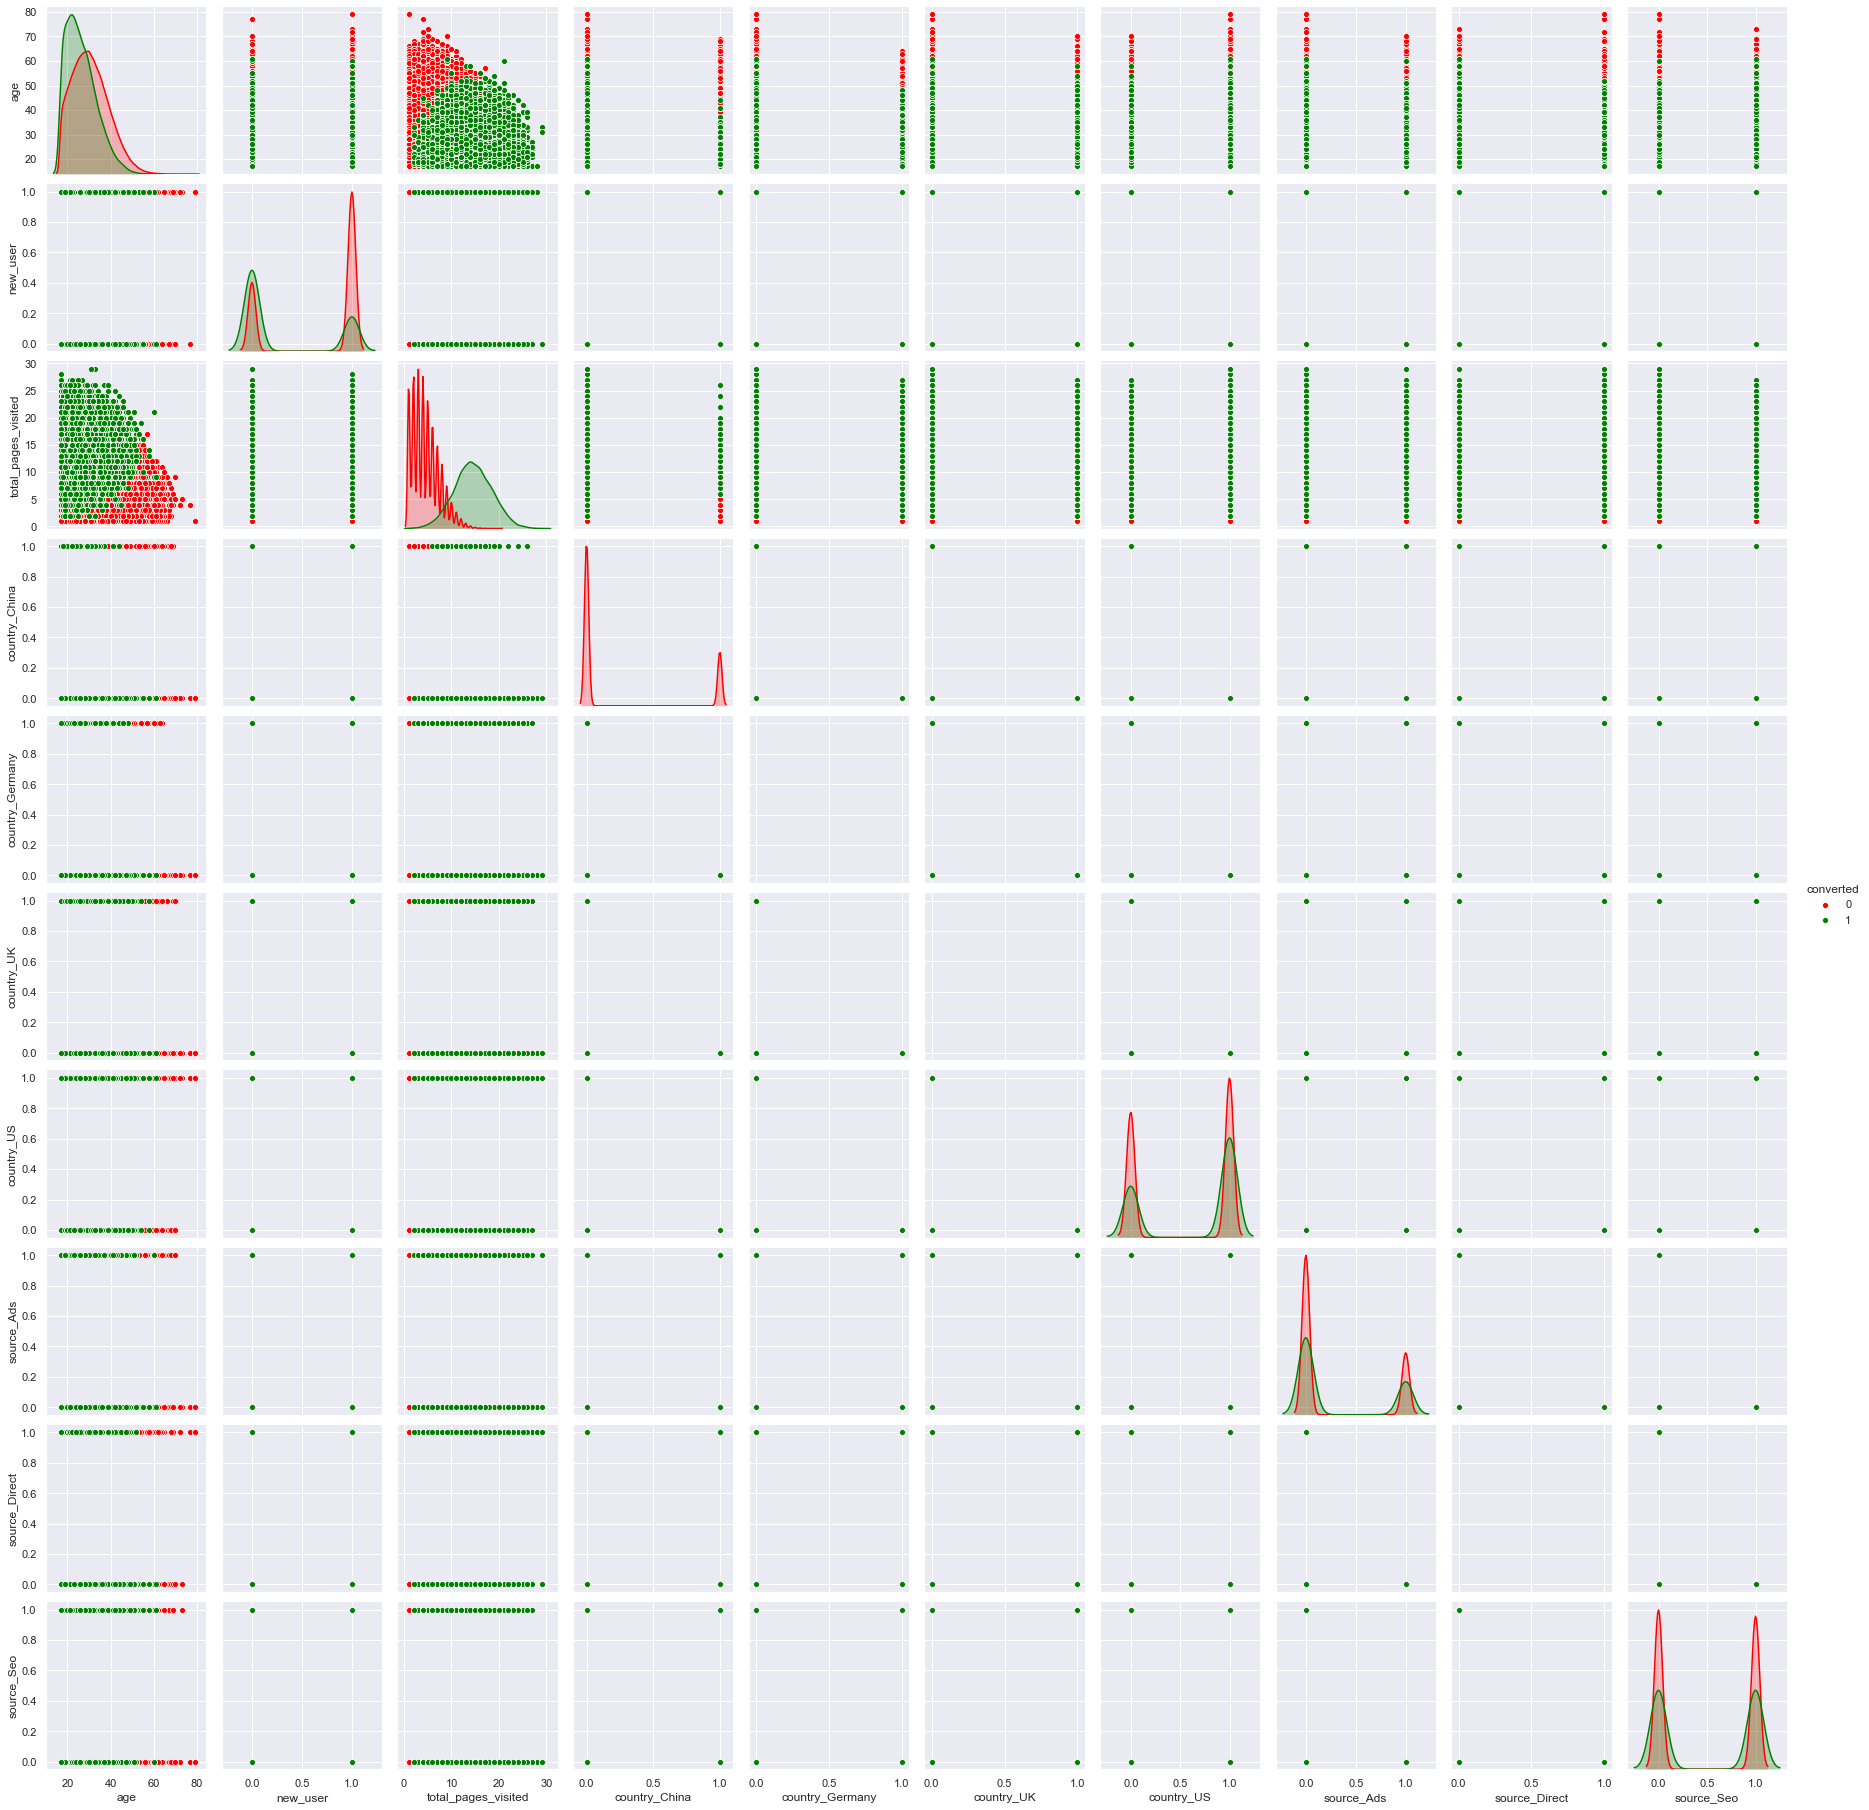

In [247]:
pal = {0: "red",  1: "green"}
sns.pairplot(df_data.loc[:, :], palette=pal, hue="converted")

#### The top 4 plots on the left corner are consistent with the observations from the boxplots. The new information is that the conversion rate for non new-users is higher than new users

### Building Training/Validation/Test Samples

#### The data will be split into:
#### 1. Training Samples: This dataset will be used to train a learning model.
#### 2. Validation Samples: This dataset is held out from the training and will be used to fine tune the model. 
#### 3. Test Samples: This dataset is held out from any decision and will be used to determine how the model performed on previously unseen data.

In [253]:
#col2use = list(df_data.columns)

In [254]:
col2use=['age',
 'new_user',
 'total_pages_visited',
 'country_China',
 'country_Germany',
 'country_UK',
 'country_US',
 'source_Ads',
 'source_Direct',
 'source_Seo']

In [255]:
df_data['OUTPUT_LABEL'] = (df_data['converted']==1)

In [256]:
print('Number of positive samples:', (df_data.OUTPUT_LABEL == 1).sum())
print('Number of negative samples:',  (df_data.OUTPUT_LABEL == 0).sum())
print('Total samples:', len(df_data))

Number of positive samples: 10198
Number of negative samples: 306000
Total samples: 316198


#### Let's check the prevalence (ratio of the people that were converted) in each of the three samples. 

In [257]:
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

# Save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)

df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

print('Test prevalence(n = %d):'%len(df_test),df_test.OUTPUT_LABEL.sum()/ len(df_test))
print('Valid prevalence(n = %d):'%len(df_valid),df_valid.OUTPUT_LABEL.sum()/ len(df_valid))
print('Train all prevalence(n = %d):'%len(df_train_all), df_train_all.OUTPUT_LABEL.sum()/ len(df_train_all))
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

Test prevalence(n = 47430): 0.03255323634830276
Valid prevalence(n = 47429): 0.032891269054797695
Train all prevalence(n = 221339): 0.032050384252210413
all samples (n = 316198)


##### The prevalence indicates that the composition of the dataset is not even. Out of 100 people there are only 3 converted people. The dataset is highly imbalanced with more negative than positive. I will create a balanced training dataset that has a 50% positive and 50% negative by randomly sub-sampling the more dominant class 

In [258]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)
print('Train prevalence (n = %d):' %len(df_train), df_train.OUTPUT_LABEL.sum()/len(df_train))

Train prevalence (n = 14188): 0.5


In [259]:
len(df_train.columns)

12

### It is a good practice to save a copy of the data at this point

In [260]:
df_train_all.to_csv('df_converted_train_all.csv',index=False)
df_train.to_csv('df_converted_train.csv',index=False)
df_valid.to_csv('df_converted_valid.csv',index=False)
df_test.to_csv('df_converted_test.csv',index=False)

In [261]:
col2use

['age',
 'new_user',
 'total_pages_visited',
 'country_China',
 'country_Germany',
 'country_UK',
 'country_US',
 'source_Ads',
 'source_Direct',
 'source_Seo']

In [262]:
X_train = df_train[col2use].values
X_train_all = df_train_all[col2use].values
X_valid = df_valid[col2use].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (221339, 10)
Training shapes: (14188, 10) (14188,)
Validation shapes: (47429, 10) (47429,)


In [263]:
from sklearn.preprocessing import StandardScaler

In [264]:
scaler = StandardScaler()
scaler.fit(X_train_all)

StandardScaler()

In [265]:
scaler

StandardScaler()

#### We will need this scaler for the test data, so let's save it

In [266]:
import pickle 
scalerfile = 'scaler_converted.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [267]:
scaler = pickle.load(open(scalerfile, 'rb'))

In [268]:
### Transforming the training and validation dataset with the scaling factor

In [269]:
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

## Model Selection: Fitting Different Learning Models

In [270]:
from sklearn.metrics import roc_auc_score,accuracy_score, precision_score, recall_score

def calc_specificity(y_true, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_true == 0)) /sum(y_true ==0)

def calc_prevalence(y_true):
    return (sum(y_true)/len(y_true))

def print_report(y_true, y_pred, thresh):
    auc = roc_auc_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, (y_pred > thresh))
    recall = recall_score(y_true, (y_pred > thresh))
    precision = precision_score(y_true, (y_pred > thresh))
    specificity = calc_specificity(y_true, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_true))
    print(' ')
    return auc, accuracy, recall, precision, specificity

### Logistic Regression

In [271]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_tf, y_train)

LogisticRegression(random_state=42)

In [272]:
y_train_pred = lr.predict_proba(X_train_tf)[:,1]
y_valid_pred = lr.predict_proba(X_valid_tf)[:,1]

threshold =0.5
print('Logistic Regression\n')
print('training:')
lr_train_auc, lr_train_accuracy, lr_train_recall,\
lr_train_precision, lr_train_specificity=print_report(y_train, y_train_pred, threshold)

print(' ')
print('validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall,\
lr_valid_precision, lr_valid_specificity=print_report(y_valid, y_valid_pred, threshold)

Logistic Regression

training:
AUC:0.986
accuracy:0.941
recall:0.941
precision:0.941
specificity:0.941
prevalence:0.500
 
 
validation:
AUC:0.985
accuracy:0.940
recall:0.938
precision:0.346
specificity:0.940
prevalence:0.033
 


### Stochastic Gradient Descent

In [273]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, loss='log', random_state=42)

In [274]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend\n')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, threshold)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, threshold)

Stochastic Gradient Descend

Training:
AUC:0.986
accuracy:0.939
recall:0.933
precision:0.945
specificity:0.946
prevalence:0.500
 
Validation:
AUC:0.985
accuracy:0.945
recall:0.934
precision:0.367
specificity:0.945
prevalence:0.033
 


### Random Froest

In [275]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 10, random_state=42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [276]:
y_train_pred = rf.predict_proba(X_train_tf)[:,1]
y_valid_pred = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest Classifier\n')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_pred, threshold)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_pred, threshold)

Random Forest Classifier

Training:
AUC:0.993
accuracy:0.953
recall:0.950
precision:0.955
specificity:0.956
prevalence:0.500
 
Validation:
AUC:0.983
accuracy:0.940
recall:0.934
precision:0.345
specificity:0.940
prevalence:0.033
 


### Gradient Boosting Decision Tree

In [277]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [278]:
y_train_pred = gbc.predict_proba(X_train_tf)[:,1]
y_valid_pred = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier\n')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity =print_report(y_train,y_train_pred, threshold)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_pred, threshold)

Gradient Boosting Classifier

Training:
AUC:0.990
accuracy:0.948
recall:0.948
precision:0.949
specificity:0.949
prevalence:0.500
 
Validation:
AUC:0.982
accuracy:0.933
recall:0.933
precision:0.323
specificity:0.933
prevalence:0.033
 


### Decision Tree Classifier

In [279]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [280]:
y_train_pred = tree.predict_proba(X_train_tf)[:,1]
y_valid_pred = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree Classifier\n')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_pred, threshold)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_pred, threshold)

Decision Tree Classifier

Training:
AUC:0.992
accuracy:0.951
recall:0.939
precision:0.962
specificity:0.957
prevalence:0.500
 
Validation:
AUC:0.966
accuracy:0.941
recall:0.917
precision:0.351
specificity:0.936
prevalence:0.033
 


### K Nearest Neighbors

In [281]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier()

In [282]:
y_train_pred = knn.predict_proba(X_train_tf)[:,1]
y_valid_pred = knn.predict_proba(X_valid_tf)[:,1]

threshold =0.5
print('KNN\n')
print('training:')
knn_train_auc, knn_train_accuracy, knn_train_recall,\
knn_train_precision, knn_train_specificity=print_report(y_train, y_train_pred, threshold)

print(' ')
print('validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall,\
knn_valid_precision, knn_valid_specificity=print_report(y_valid, y_valid_pred, threshold)

KNN

training:
AUC:0.992
accuracy:0.951
recall:0.949
precision:0.952
specificity:0.952
prevalence:0.500
 
 
validation:
AUC:0.970
accuracy:0.930
recall:0.932
precision:0.312
specificity:0.930
prevalence:0.033
 


### Naive Baye

In [283]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB()

In [284]:
y_train_pred = nb.predict_proba(X_train_tf)[:,1]
y_valid_pred = nb.predict_proba(X_valid_tf)[:,1]

threshold =0.5
print('Naive Baye\n')
print('training:')
nb_train_auc, nb_train_accuracy, nb_train_recall,\
nb_train_precision, nb_train_specificity=print_report(y_train, y_train_pred, threshold)

print(' ')
print('validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall,\
nb_valid_precision, nb_valid_specificity=print_report(y_valid, y_valid_pred, threshold)

Naive Baye

training:
AUC:0.976
accuracy:0.912
recall:0.963
precision:0.873
specificity:0.860
prevalence:0.500
 
 
validation:
AUC:0.973
accuracy:0.864
recall:0.959
precision:0.190
specificity:0.861
prevalence:0.033
 


In [285]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_valid_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_valid_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_valid_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_valid_auc,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_valid_specificity,gbc_valid_specificity,]})

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

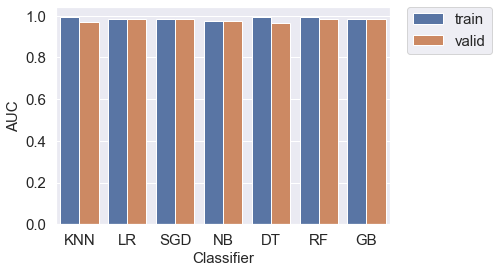

In [287]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

### Model Selection: Learning Curve


In [288]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#### Cross-validation is a technique for splitting the data multiple times to get a better estimate of the performance metric

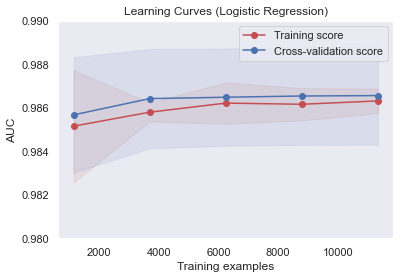

In [289]:
title = "Learning Curves (Logistic Regression)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = LogisticRegression(random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.98, 0.99), cv=cv, n_jobs=4)

plt.show()

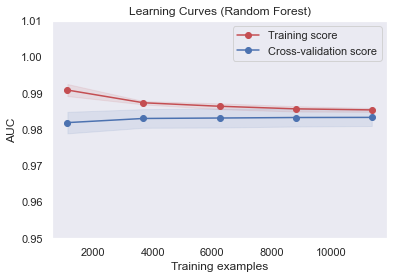

In [290]:
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 6, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.95, 1.01), cv=cv, n_jobs=4)

plt.show()

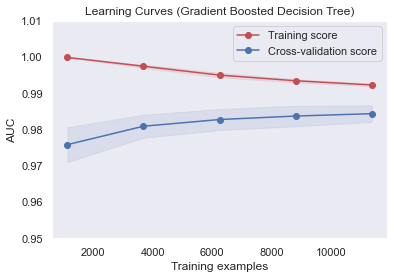

In [291]:
title = "Learning Curves (Gradient Boosted Decision Tree)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = GradientBoostingClassifier(max_depth = 6, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.95, 1.01), cv=cv, n_jobs=4)

plt.show()

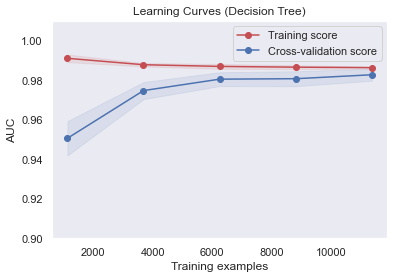

In [292]:
title = "Learning Curves (Decision Tree)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = DecisionTreeClassifier(max_depth = 6, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.9, 1.01), cv=cv, n_jobs=4)

plt.show()

##### Looking at the top four performing models, the difference in score between the training models and the cross validation is an indication that the tree models are overfitting for sample. The Random Forest maintains a high score keeping the difference between training and cross validation fairly low  

### Feature Importance: Logistic Regression

#### For logistic regression, the variables with highest positive coefficients are predictive of high conversion rate and the variables with highest negative coefficients are predictive of non-conversion. 

In [293]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [294]:
feature_importances.head()

,importance
total_pages_visited,2.536265
country_US,0.489451
country_UK,0.457158
country_Germany,0.320690
source_Seo,0.045606


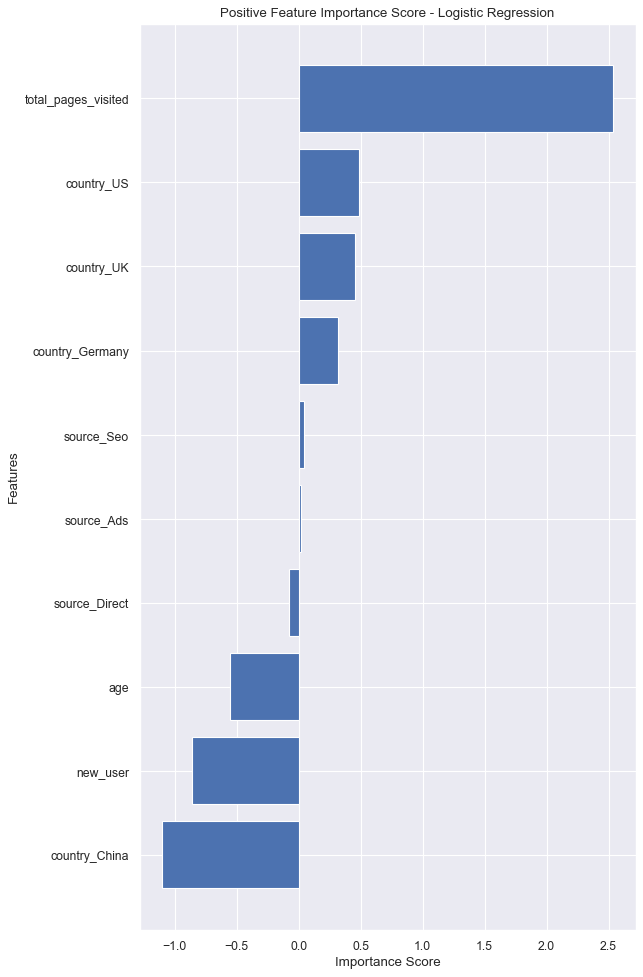

In [295]:
import matplotlib.pyplot as plt 
num = 10
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

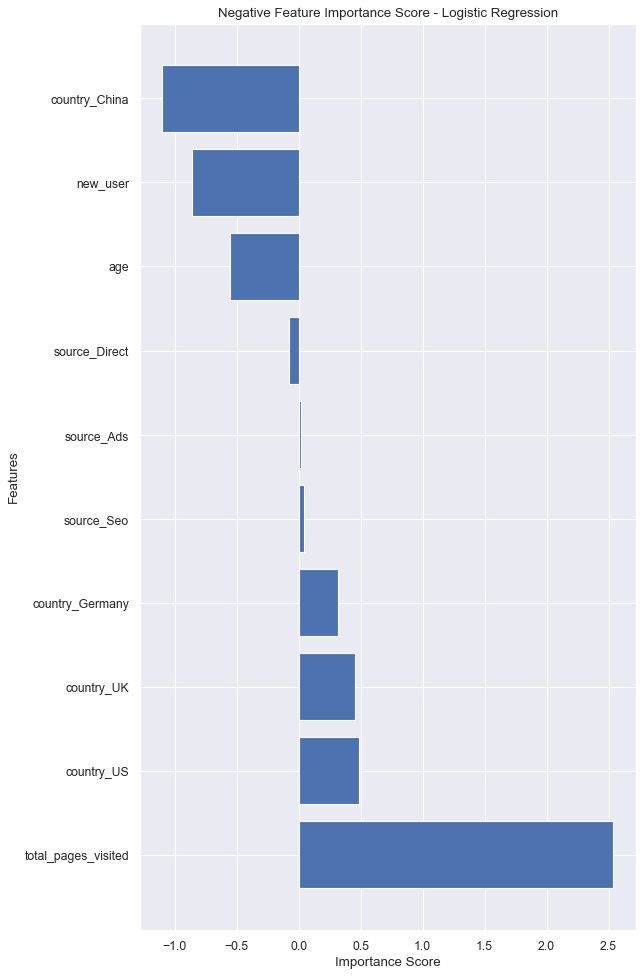

In [296]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

### Feature Importance: Random Forest

#### We can also investigate feature importance for random forest models. In this case, the feature importance shows how often a particular feature was used to split the data. We don't know if a particular feature is correlated with the positive class or negative class, but rather it is just importance for making a decision.

In [297]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [298]:
feature_importances.head()


,importance
total_pages_visited,0.775575
new_user,0.087841
country_China,0.057744
age,0.055333
country_UK,0.007878


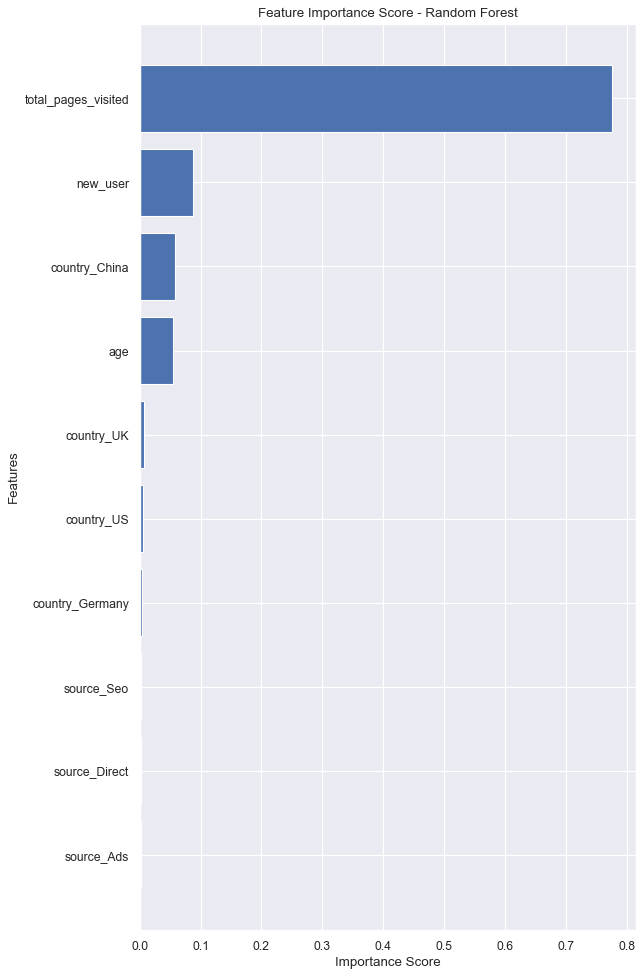

In [299]:
num=10
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

### Model Selection Parameter Tuning

In [300]:
rf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [301]:
# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(1,10,1)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(1, 10), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [302]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

### Three important parameters of RandomizedSearchCV are:
#### scoring = evaluation metric used to pick the best model
#### n_iter = number of different combinations
#### cv = number of cross-validation splits
#### increasing n_iter and cv will decrease chance of overfitting. 

### Optimizing Random Forest

In [303]:
# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 3, scoring=auc_scoring,
                               verbose = 1, random_state = 42)

In [304]:
rf_random.fit(X_train_tf,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.2min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    random_state=42),
                   n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': range(2, 10, 2),
                                        'n_estimators': range(200, 1000, 200)},
                   random_state=42, scoring=make_scorer(roc_auc_score),
                   verbose=1)

In [305]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 6,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'gini'}

### Optimizing Stochastic Gradient Descent

In [306]:
penalty = ['none','l2','l1']
max_iter = range(100,500,100)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, 
                                 n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, 
                                 random_state = 42)


sgdc_random.fit(X_train_tf, y_train)

RandomizedSearchCV(cv=2,
                   estimator=SGDClassifier(alpha=0.1, loss='log',
                                           random_state=42),
                   n_iter=20,
                   param_distributions={'alpha': [0.001, 0.003, 0.01, 0.03, 0.1,
                                                  0.3],
                                        'max_iter': range(100, 500, 100),
                                        'penalty': ['none', 'l2', 'l1']},
                   random_state=42, scoring=make_scorer(roc_auc_score))

In [307]:
sgdc_random.best_params_

{'penalty': 'l2', 'max_iter': 400, 'alpha': 0.003}

### Optimizing Boosted Decision Tree

In [308]:
# number of trees
n_estimators = range(100,500,100)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc,
                                n_iter = 20, cv = 2, scoring=auc_scoring,
                                verbose = 0, random_state = 42)


gbc_random.fit(X_train_tf, y_train)


RandomizedSearchCV(cv=2,
                   estimator=GradientBoostingClassifier(learning_rate=1.0,
                                                        random_state=42),
                   n_iter=20,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': range(1, 5),
                                        'n_estimators': range(100, 500, 100)},
                   random_state=42, scoring=make_scorer(roc_auc_score))

In [309]:
gbc_random.best_params_


{'n_estimators': 200, 'max_depth': 1, 'learning_rate': 0.1}

### Model Performance

In [310]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Baseline Random Forest')
rf_train_auc_base = roc_auc_score(y_train, y_train_preds)
rf_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_auc_base))
print('Validation AUC:%.3f'%(rf_valid_auc_base))
print("")
print('Optimized Random Forestn')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_auc))
print('Validation AUC:%.3f'%(rf_valid_auc))

Baseline Random Forest
Training AUC:0.993
Validation AUC:0.983

Optimized Random Forestn
Training AUC:0.990
Validation AUC:0.984


In [311]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Baseline sgdc')
sgdc_train_auc_base = roc_auc_score(y_train, y_train_preds)
sgdc_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_auc_base))
print('Validation AUC:%.3f'%(sgdc_valid_auc_base))
print("")
print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_auc))
print('Validation AUC:%.3f'%(sgdc_valid_auc))

Baseline sgdc
Training AUC:0.986
Validation AUC:0.985

Optimized sgdc
Training AUC:0.986
Validation AUC:0.985


In [312]:
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Baseline gbc')
gbc_train_auc_base = roc_auc_score(y_train, y_train_preds)
gbc_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_auc_base))
print('Validation AUC:%.3f'%(gbc_valid_auc_base))
print("")
print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_auc))
print('Validation AUC:%.3f'%(gbc_valid_auc))

Baseline gbc
Training AUC:0.986
Validation AUC:0.982

Optimized gbc
Training AUC:0.986
Validation AUC:0.985


In [313]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['base','optimized']*3,
                          'auc':[sgdc_valid_auc_base,sgdc_valid_auc,
                                 rf_valid_auc_base,rf_valid_auc,
                                 gbc_valid_auc_base,gbc_valid_auc,],
                          })

In [314]:
df_results

,classifier,data_set,auc
0,SGD,base,0.984913
1,SGD,optimized,0.985336
2,RF,base,0.983450
3,RF,optimized,0.984088
4,GB,base,0.981941
5,GB,optimized,0.984968


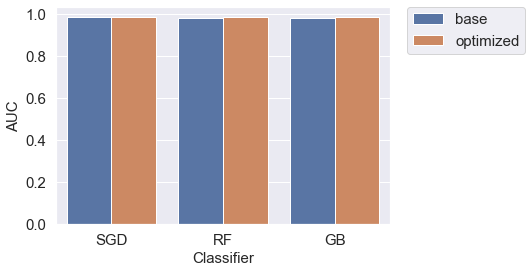

In [315]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

### Model Selection Best Classifier

### Overall the Random Forest classifier. 

In [316]:
pickle.dump(rf_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol=4)

### Model Evaluation

In [329]:
X_test = df_test[col2use].values
y_test = df_test['OUTPUT_LABEL'].values

scaler = pickle.load(open('scaler_converted.sav', 'rb'))
X_test_tf = scaler.transform(X_test)

In [330]:
np.shape(X_test_tf)

(47430, 10)

In [331]:
best_model = pickle.load(open('best_classifier.pkl','rb'))


In [332]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [333]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.990
accuracy:0.948
recall:0.945
precision:0.950
specificity:0.950
prevalence:0.500
 
Validation:
AUC:0.984
accuracy:0.941
recall:0.935
precision:0.349
specificity:0.941
prevalence:0.033
 
Test:
AUC:0.984
accuracy:0.942
recall:0.931
precision:0.351
specificity:0.942
prevalence:0.033
 


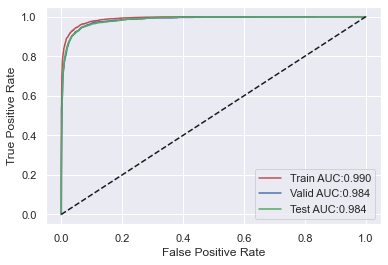

In [335]:
from sklearn.metrics import roc_curve 
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
